In [300]:
import stock_helper
import pandas as pd
from datetime import datetime
import numpy as np

# tesla > google > amd > ge
dataset = stock_helper.fetch_stock_data('AMD', '30y')

In [301]:
df = stock_helper.generate_indicators(dataset, 
                                      timeperiod=2, 
                                      generate_target=True, 
                                      reset_index=True)

# Convert date to the n-th day from 1970-01-01
df['date'] = df['date'].apply(lambda date64: (date64 - np.datetime64('1970-01-01T00:00:00')) / np.timedelta64(1, 'D'))

In [302]:
df.head()

,date,high,low,open,close,volume,RSI,MOM,slowk,slowd,macd,macdsignal,macdhist,ADX,SMA,upper_bb,middel_bb,lower_bb,next_2day_trend
0,7802.0,6.2500,6.0000,6.1250,6.0000,720400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,7803.0,6.0000,5.8125,6.0000,5.9375,595400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,7804.0,5.8750,5.3750,5.8125,5.5625,3203200,0.0,-0.4375,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,7805.0,5.5625,5.2500,5.5000,5.5625,1183800,0.0,-0.3750,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,7806.0,5.5625,5.3750,5.5000,5.5000,859800,0.0,-0.0625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [303]:
df = df.drop(columns = ["RSI", "MOM", "slowk", "slowd", "macd", "macdsignal", "macdhist", "ADX", "SMA", "upper_bb", "middel_bb", "lower_bb"])

df.head()

,date,high,low,open,close,volume,next_2day_trend
0,7802.0,6.2500,6.0000,6.1250,6.0000,720400,0
1,7803.0,6.0000,5.8125,6.0000,5.9375,595400,0
2,7804.0,5.8750,5.3750,5.8125,5.5625,3203200,0
3,7805.0,5.5625,5.2500,5.5000,5.5625,1183800,1
4,7806.0,5.5625,5.3750,5.5000,5.5000,859800,1


In [304]:
df = df.drop(columns = ["date"])

df.head()

,high,low,open,close,volume,next_2day_trend
0,6.2500,6.0000,6.1250,6.0000,720400,0
1,6.0000,5.8125,6.0000,5.9375,595400,0
2,5.8750,5.3750,5.8125,5.5625,3203200,0
3,5.5625,5.2500,5.5000,5.5625,1183800,1
4,5.5625,5.3750,5.5000,5.5000,859800,1


In [305]:
df = df.dropna()


#split data randomly
from sklearn.model_selection import train_test_split

# target_name = df.columns[-1]

# train_X, test_X, train_y, test_y = train_test_split(df.drop(target_name, axis = 1), df[target_name], test_size=0.10, random_state=4)

train_size = int(len(df) * 0.8)
train = df.iloc[:train_size, :]
test = df.iloc[train_size:, :]

target_name = df.columns[-1]
train_X = train.drop(target_name, axis = 1)
train_y = train[target_name]

test_X = test.drop(target_name, axis = 1)
test_y = test[target_name]

In [306]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=2)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.4808201058201058

In [307]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=5)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.48148148148148145

In [308]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(max_depth=4)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.4794973544973545

In [309]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(max_depth=8)
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.4828042328042328

In [310]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
x_train_counts = count_vect.fit_transform(train_X).toarray()
x_test_counts = count_vect.transform(test_X).toarray()

In [311]:
x_train_counts.shape

(5, 5)

In [312]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_X, train_y)

hyp = clf.predict(test_X)
accuracy_score(test_y, hyp)

0.4794973544973545

In [313]:
train_X

,high,low,open,close,volume
0,6.2500,6.0000,6.1250,6.0000,720400
1,6.0000,5.8125,6.0000,5.9375,595400
2,5.8750,5.3750,5.8125,5.5625,3203200
3,5.5625,5.2500,5.5000,5.5625,1183800
4,5.5625,5.3750,5.5000,5.5000,859800
...,...,...,...,...,...
6039,2.3100,2.2500,2.2600,2.3100,11662800
6040,2.3600,2.3000,2.3100,2.3100,9670100
6041,2.3400,2.2500,2.3400,2.2800,12371600
6042,2.3100,2.2400,2.2900,2.2900,18492100


In [314]:
train_y

0       0
1       0
2       0
3       1
4       1
       ..
6039    0
6040    0
6041    1
6042    1
6043    0
Name: next_2day_trend, Length: 6044, dtype: int64

In [315]:
train_x_2 = train_X.copy()

train_y_2 = train_y.copy()

test_x_2 = test_X.copy()

test_y_2 = test_y.copy()

In [316]:
df2 = df.copy()



In [317]:
# Helper Functions
# In order to print all performance metrics relevant to a regression task (such as MAE and R-square), we will be defining the regression_results function.

import sklearn.metrics as metrics
def regression_results(y_true, y_pred):
    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [318]:
# use the difference between today and today - 1, today - 1 and today - 2, ... today - 4 and today - 5

df3 = pd.DataFrame()

for columnName in df2.columns:
    if columnName != "volume" and columnName != "next_2day_trend":
        column = df2[[columnName]]

        df3.loc[:,'shift1' + columnName] = (df2.loc[:,columnName].shift() - df2.loc[:,columnName]) / df2.loc[:,columnName]

        df3.loc[:,'shift2' + columnName] = (df2.loc[:,columnName].shift().shift() - df2.loc[:,columnName].shift()) / df2.loc[:,columnName]

        df3.loc[:,'shift3' + columnName] = (df2.loc[:,columnName].shift().shift().shift() - df2.loc[:,columnName].shift().shift()) / df2.loc[:,columnName]

        df3.loc[:,'shift4' + columnName] = (df2.loc[:,columnName].shift().shift().shift().shift() - df2.loc[:,columnName].shift().shift().shift()) / df2.loc[:,columnName]

        df3.loc[:,'shift5' + columnName] = (df2.loc[:,columnName].shift().shift().shift().shift().shift() - df2.loc[:,columnName].shift().shift().shift().shift()) / df2.loc[:,columnName]


#add volumn and and next_5day_trend, then drop na
# df3["date"] = df2["date"]
df3["volume"] = df2["volume"]
df3["next_2day_trend"] = df2["next_2day_trend"]

df3 = df3.dropna()



In [319]:
df3.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift3open,shift4open,shift5open,shift1close,shift2close,shift3close,shift4close,shift5close,volume,next_2day_trend
5,-0.032609,0.000000,0.054348,0.021739,0.043478,-0.022727,-0.022727,0.022727,0.079545,0.034091,...,0.056180,0.033708,0.022472,-0.032967,0.010989,0.000000,0.065934,0.010989,620000,1
6,-0.051546,-0.030928,0.000000,0.051546,0.020619,-0.063830,-0.021277,-0.021277,0.021277,0.074468,...,0.000000,0.052632,0.031579,-0.052083,-0.031250,0.010417,0.000000,0.062500,2806000,1
7,-0.076190,-0.047619,-0.028571,0.000000,0.047619,-0.040816,-0.061224,-0.020408,-0.020408,0.020408,...,-0.010101,0.000000,0.050505,-0.076923,-0.048077,-0.028846,0.009615,0.000000,3533600,0
8,-0.027778,-0.074074,-0.046296,-0.027778,0.000000,-0.039216,-0.039216,-0.058824,-0.019608,-0.019608,...,-0.057692,-0.009615,0.000000,0.009709,-0.077670,-0.048544,-0.029126,0.009709,4091600,1
9,0.038462,-0.028846,-0.076923,-0.048077,-0.028846,0.009901,-0.039604,-0.039604,-0.059406,-0.019802,...,-0.038835,-0.058252,-0.009709,-0.009615,0.009615,-0.076923,-0.048077,-0.028846,1462000,0


In [320]:
train_size = int(len(df3) * 0.8)
train = df3.iloc[:train_size, :]
test = df3.iloc[train_size:, :]

target_name = df.columns[-1]
train_X = train.drop(target_name, axis = 1)
train_y = train[target_name]

test_X = test.drop(target_name, axis = 1)
test_y = test[target_name]

In [321]:
train_X.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift2open,shift3open,shift4open,shift5open,shift1close,shift2close,shift3close,shift4close,shift5close,volume
5,-0.032609,0.000000,0.054348,0.021739,0.043478,-0.022727,-0.022727,0.022727,0.079545,0.034091,...,0.000000,0.056180,0.033708,0.022472,-0.032967,0.010989,0.000000,0.065934,0.010989,620000
6,-0.051546,-0.030928,0.000000,0.051546,0.020619,-0.063830,-0.021277,-0.021277,0.021277,0.074468,...,-0.010526,0.000000,0.052632,0.031579,-0.052083,-0.031250,0.010417,0.000000,0.062500,2806000
7,-0.076190,-0.047619,-0.028571,0.000000,0.047619,-0.040816,-0.061224,-0.020408,-0.020408,0.020408,...,-0.060606,-0.010101,0.000000,0.050505,-0.076923,-0.048077,-0.028846,0.009615,0.000000,3533600
8,-0.027778,-0.074074,-0.046296,-0.027778,0.000000,-0.039216,-0.039216,-0.058824,-0.019608,-0.019608,...,-0.038462,-0.057692,-0.009615,0.000000,0.009709,-0.077670,-0.048544,-0.029126,0.009709,4091600
9,0.038462,-0.028846,-0.076923,-0.048077,-0.028846,0.009901,-0.039604,-0.039604,-0.059406,-0.019802,...,-0.048544,-0.038835,-0.058252,-0.009709,-0.009615,0.009615,-0.076923,-0.048077,-0.028846,1462000


In [322]:
def result_transfer(foloatValue):
    if foloatValue > 0:
        return 1
    else:
        return 0

LR: 0.520185
RFR: 0.497022
DT: 0.493713
NN: 0.520185
KNN: 0.522171
RF: 0.520847
SVR: 0.520185


<BarContainer object of 7 artists>

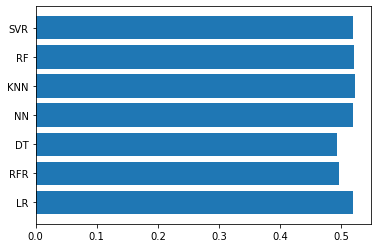

In [323]:
# //TODO: use cross-validation!!!

import matplotlib.pyplot as plt
from sklearn.model_selection import TimeSeriesSplit
from sklearn.linear_model import LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier

# Spot Check Algorithms
models = []
models.append(('LR', LinearRegression()))
models.append(('RFR', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
models.append(('NN', MLPRegressor(solver = 'lbfgs', max_iter = 500)))  #neural network
models.append(('KNN', KNeighborsRegressor())) 
models.append(('RF', RandomForestRegressor(n_estimators = 10))) # Ensemble method - collection of many decision trees
models.append(('SVR', SVR(gamma='auto'))) # kernel = linear
# Evaluate each model in turn
results = []
names = []
for name, model in models:
    # TimeSeries Cross validation
#     tscv = TimeSeriesSplit(n_splits=3)
    
#     cv_results = cross_val_score(model, train_X, train_y, cv=tscv, scoring='r2')
    clf = model
    clf.fit(train_X, train_y)

    hyp = []
    for i in clf.predict(test_X):
        hyp.append(result_transfer(i))
#     print(hyp)
    
#     = clf.predict(test_X).apply(result_transfer)
#     accuracy_score(test_y, hyp)
    
    results.append(accuracy_score(test_y, hyp))
    names.append(name)
    print('%s: %f' % (name, accuracy_score(test_y, hyp)))
    
# Compare Algorithms
plt.barh(names, results)

In [324]:
# //TODO: use cross-validation!!!

In [325]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

clf = LogisticRegression()
clf.fit(train_X, train_y)

hyp = clf.predict(test_X)
accuracy_score(test_y, hyp)

0.4798146922567836

In [326]:
train_X.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift2open,shift3open,shift4open,shift5open,shift1close,shift2close,shift3close,shift4close,shift5close,volume
5,-0.032609,0.000000,0.054348,0.021739,0.043478,-0.022727,-0.022727,0.022727,0.079545,0.034091,...,0.000000,0.056180,0.033708,0.022472,-0.032967,0.010989,0.000000,0.065934,0.010989,620000
6,-0.051546,-0.030928,0.000000,0.051546,0.020619,-0.063830,-0.021277,-0.021277,0.021277,0.074468,...,-0.010526,0.000000,0.052632,0.031579,-0.052083,-0.031250,0.010417,0.000000,0.062500,2806000
7,-0.076190,-0.047619,-0.028571,0.000000,0.047619,-0.040816,-0.061224,-0.020408,-0.020408,0.020408,...,-0.060606,-0.010101,0.000000,0.050505,-0.076923,-0.048077,-0.028846,0.009615,0.000000,3533600
8,-0.027778,-0.074074,-0.046296,-0.027778,0.000000,-0.039216,-0.039216,-0.058824,-0.019608,-0.019608,...,-0.038462,-0.057692,-0.009615,0.000000,0.009709,-0.077670,-0.048544,-0.029126,0.009709,4091600
9,0.038462,-0.028846,-0.076923,-0.048077,-0.028846,0.009901,-0.039604,-0.039604,-0.059406,-0.019802,...,-0.048544,-0.038835,-0.058252,-0.009709,-0.009615,0.009615,-0.076923,-0.048077,-0.028846,1462000


In [327]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

from sklearn.metrics import accuracy_score
accuracy_score(test_y, prediction)

0.4956982131039047

In [299]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(train_X, train_y)
prediction = clf.predict(test_X)

accuracy_score(test_y, prediction)

0.5238095238095238

In [235]:
train_X.head()

,shift1high,shift2high,shift3high,shift4high,shift5high,shift1low,shift2low,shift3low,shift4low,shift5low,...,shift2open,shift3open,shift4open,shift5open,shift1close,shift2close,shift3close,shift4close,shift5close,volume
5,0.000463,0.033349,0.017415,-0.040760,-0.046503,-0.007453,-0.002962,0.052360,-0.081693,-0.043379,...,0.059838,-0.004669,-0.092806,-0.009624,-0.017700,-0.010472,0.041979,-0.010101,-0.073858,7128620
6,-0.006168,0.000460,0.033143,0.017308,-0.040508,-0.009745,-0.007380,-0.002933,0.051850,-0.080897,...,0.000093,0.058094,-0.004533,-0.090102,0.016580,-0.017993,-0.010645,0.042675,-0.010268,6241307
7,0.029671,-0.006351,0.000474,0.034126,0.017822,0.036075,-0.010097,-0.007646,-0.003039,0.053720,...,-0.029920,0.000095,0.059650,-0.004654,0.040584,0.017253,-0.018724,-0.011077,0.044407,5221498
8,0.017163,0.030180,-0.006460,0.000482,0.034712,-0.001468,0.036022,-0.010082,-0.007635,-0.003034,...,0.027566,-0.030792,0.000098,0.061388,-0.003517,0.040442,0.017193,-0.018658,-0.011038,4941252
9,0.007187,0.017287,0.030397,-0.006507,0.000486,0.024982,-0.001505,0.036922,-0.010334,-0.007826,...,0.029017,0.027459,-0.030672,0.000097,0.021147,-0.003591,0.041297,0.017556,-0.019052,9181687
